In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
#warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

# Disable SettingWithCopyWarning
pd.options.mode.chained_assignment = None

# Defining Strategy
## Day Trader Strategy (9-13 minute crossover)
## Swing Trader Strategy (20-100 day crossover)
## Long-term Trader Strategy (50 or 100-200 day crossover)

In [2]:
def day_trader_strategy(ticker):
    # Get stock data from Yahoo Finance
    stock_data = yf.download(ticker, period="1d", interval="5m")
    
    # Calculate moving averages
    ema9 = stock_data['Close'].ewm(span=9).mean()
    ema13 = stock_data['Close'].ewm(span=13).mean()
    #Added by Alex
    clsd = stock_data['Close']
    
    # Create a DataFrame to store signals
    signals = pd.DataFrame(index=stock_data.index)
    signals['position'] = 0
    # Added by Alex
    signals['closed'] = clsd
    
    # Determine when to enter and exit the market
    signals['short_ema'] = ema9
    signals['long_ema'] = ema13
    signals.loc[9:, 'position'] = np.where(signals['short_ema'][9:] > signals['long_ema'][9:], 1, 0)
    signals.loc[13:, 'position'] = np.where(signals['short_ema'][13:] < signals['long_ema'][13:], -1, signals['position'][13:])
    signals['position'] = signals['position'].ffill().fillna(0)
    
    # Plot the chart
    fig, ax = plt.subplots(figsize=(16,9))
    ax.plot(stock_data.index, stock_data['Close'], label='Close Price')
    # ax.plot(signals.loc[signals.position == 1.0].index, stock_data['Close'][signals.position == 1.0], '^', markersize=10, color='g', label='Buy')
    # ax.plot(signals.loc[signals.position == -1.0].index, stock_data['Close'][signals.position == -1.0], 'v', markersize=10, color='r', label='Sell')
    ax.plot(ema9.index, ema9, label='9 EMA')
    ax.plot(ema13.index, ema13, label='13 EMA')
    ax.legend(loc='upper left')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price ($)')
    plt.show()

    return signals

In [3]:
def swing_trader_strategy(ticker):
    # Get stock data from Yahoo Finance
    stock_data = yf.download(ticker, period="1y", interval="1d")
    
    # Calculate moving averages
    ema20 = stock_data['Close'].ewm(span=20).mean()
    ema100 = stock_data['Close'].ewm(span=100).mean()
    
    # Create a DataFrame to store signals
    signals = pd.DataFrame(index=stock_data.index)
    signals['position'] = 0
    
    # Determine when to enter and exit the market
    signals['short_ema'] = ema20
    signals['long_ema'] = ema100
    signals['position'][20:] = np.where(signals['short_ema'][20:] > signals['long_ema'][20:], 1, 0)
    signals['position'][100:] = np.where(signals['short_ema'][100:] < signals['long_ema'][100:], -1, signals['position'][100:])
    signals['position'] = signals['position'].ffill().fillna(0)
    
    # Plot the chart
    fig, ax = plt.subplots(figsize=(16,9))
    ax.plot(stock_data.index, stock_data['Close'], label='Close Price')
    # ax.plot(signals.loc[signals.position == 1.0].index, stock_data['Close'][signals.position == 1.0], '^', markersize=10, color='g', label='Buy')
    # ax.plot(signals.loc[signals.position == -1.0].index, stock_data['Close'][signals.position == -1.0], 'v', markersize=10, color='r', label='Sell')
    ax.plot(ema20.index, ema20, label='20 EMA')
    ax.plot(ema100.index, ema100, label='100 EMA')
    ax.legend(loc='upper left')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price ($)')
    plt.show()
    
    return signals


In [4]:
def long_term_trader_strategy(ticker):
    # Get stock data from Yahoo Finance
    stock_data = yf.download(ticker, period="5y", interval="1d")
    
    # Calculate moving averages
    ema50 = stock_data['Close'].ewm(span=50).mean()
    ema100 = stock_data['Close'].ewm(span=100).mean()
    ema200 = stock_data['Close'].ewm(span=200).mean()
    
    # Create a DataFrame to store signals
    signals = pd.DataFrame(index=stock_data.index)
    signals['position'] = 0
    
    # Determine when to enter and exit the market
    signals['short_ema'] = ema50
    signals['medium_ema'] = ema100
    signals['long_ema'] = ema200
    signals.loc[50:, 'position'] = np.where(signals['short_ema'][50:] > signals['long_ema'][50:], 1, 0)
    signals.loc[50:, 'position'] = np.where(signals['short_ema'][50:] < signals['medium_ema'][50:], -1, signals['position'][50:])
    signals['position'][200:] = np.where(signals['short_ema'][200:] < signals['long_ema'][200:], -1, signals['position'][200:])
    signals['position'] = signals['position'].ffill().fillna(0)
    
    
    # Plot the chart
    fig, ax = plt.subplots(figsize=(16,9))
    ax.plot(stock_data.index, stock_data['Close'], label='Close Price')
    # ax.plot(signals.loc[signals.position == 1.0].index, stock_data['Close'][signals.position == 1.0], '^', markersize=10, color='g', label='Buy')
    # ax.plot(signals.loc[signals.position == -1.0].index, stock_data['Close'][signals.position == -1.0], 'v', markersize=10, color='r', label='Sell')
    ax.plot(ema50.index, ema50, label='50 EMA')
    ax.plot(ema100.index, ema100, label='100 EMA')
    ax.plot(ema200.index, ema200, label='200 EMA')
    ax.legend(loc='upper left')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price ($)')
    plt.show()
    
    return signals

# Command Line Interface
## 1. Choose Strategy (Day Trader, Swing Trader, Long-term Trader)
## 2. Choose Ticker
## 3. To-do: Choose dates 

Enter the ticker symbol of the stock:  coin
Choose a strategy (1 = day trader, 2 = swing trader, 3 = long-term trader):  1


[*********************100%***********************]  1 of 1 completed


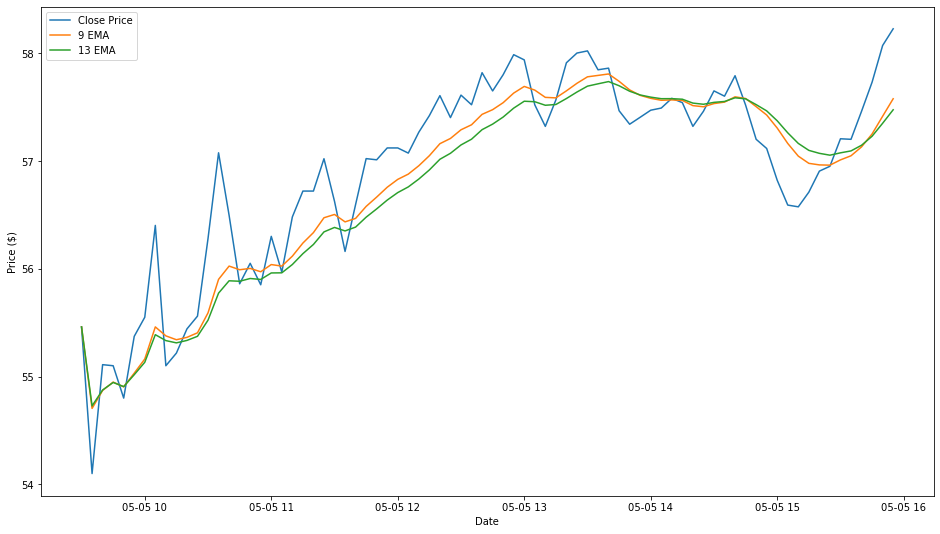

[*********************100%***********************]  1 of 1 completed
                           position     closed  short_ema   long_ema
Datetime                                                            
2023-05-05 09:30:00-04:00         0  55.459999  55.459999  55.459999
2023-05-05 09:35:00-04:00         0  54.099998  54.704443  54.727691
2023-05-05 09:40:00-04:00         0  55.110001  54.870655  54.875196
2023-05-05 09:45:00-04:00         0  55.099998  54.948346  54.944977
2023-05-05 09:50:00-04:00         0  54.799999  54.904216  54.906433
...                             ...        ...        ...        ...
2023-05-05 15:35:00-04:00        -1  57.200001  57.047324  57.092489
2023-05-05 15:40:00-04:00        -1  57.459999  57.129859  57.144991
2023-05-05 15:45:00-04:00         1  57.730000  57.249887  57.228565
2023-05-05 15:50:00-04:00         1  58.070000  57.413910  57.348770
2023-05-05 15:55:00-04:00         1  58.224998  57.576127  57.473947

[78 rows x 4 columns]

Backtestin

In [5]:
# Ask user for input
ticker = input("Enter the ticker symbol of the stock: ")
strategy_choice = input("Choose a strategy (1 = day trader, 2 = swing trader, 3 = long-term trader): ")

# Backtesting function
def backtest(signals, stock_data, initial_capital=10000):
    positions = pd.DataFrame(index=signals.index).fillna(0)
    positions['stock'] = signals['position'] * stock_data['Close']
    portfolio = positions.multiply(stock_data['Close'], axis=0)
    pos_diff = positions.diff()
    portfolio['holdings'] = (positions.multiply(stock_data['Close'], axis=0)).sum(axis=1)
    portfolio['cash'] = initial_capital - (pos_diff.multiply(stock_data['Close'], axis=0)).sum(axis=1).cumsum()
    portfolio['total'] = portfolio['cash'] + portfolio['holdings']
    portfolio['returns'] = portfolio['total'].pct_change()
    return portfolio

# Execute the chosen EMA crossover strategy and plot the results
if strategy_choice == "1":
    signals = day_trader_strategy(ticker)
    stock_data = yf.download(ticker, period="1d", interval="5m")
elif strategy_choice == "2":
    signals = swing_trader_strategy(ticker)
    stock_data = yf.download(ticker, period="1y", interval="1d")
elif strategy_choice == "3":
    signals = long_term_trader_strategy(ticker)
    stock_data = yf.download(ticker, period="5y", interval="1d")
else:
    print("Invalid strategy choice.")
    stock_data = None
    
# Perform backtesting and print the results
if stock_data is not None:
    print(signals)
    portfolio = backtest(signals, stock_data)
    print("\nBacktesting Results:")
    print(portfolio)
    
# Re-enable SettingWithCopyWarning
pd.options.mode.chained_assignment = 'warn'

# II. EXECUTING STRATEGY
## Identify when the long-term and short-term moving averages cross and define as a buy or sell opportunity

Inputs: Moving average dataframe
Outputs: Prices at crossovers and identifying buy versus sell, plot of buy/sell signals


In [6]:
# Entry Price for buying is when 5 minutes prices or closing prices cross over from 0 to 1
# Exit price for selling is when it goes from 0 or 1 to -1

In [7]:
# signals_test_df = signals

You can use the signals_test_df to test your function

In [8]:
 # Function to create a dataframe 

# def buy_sell_opportunity(moving_avg_df):
    
#     moving_avg_df['Buy_Sell'] = np.where(moving_avg_df['position'] == 1, 'Buy', 
#                                            np.where(moving_avg_df['position'] == -1, 'Sell or Out of Position', 'No Position'))
    
#     # Create columns to output for user
#     # moving_avg_df['entry_price'] = 
#     # moving_avg_df['Exit_Price'] = 
    
#     moving_avg_df = moving_avg_df[['Buy_Sell']]
    
#     return moving_avg_df

In [9]:
# # Calling the function

# buy_sell_opportunity(moving_avg_df = signals)

In [10]:
# # Call the function you just created! Using the signals dataset that was created abov
# stock_data_test = stock_data
# stock_data_test['profit_loss'] = (stock_data_test['Close'] - stock_data_test['Open']) * stock_data_test['Volume']
# stock_data_test['profit_loss_ind'] = np.where(stock_data_test['profit_loss'] > 0, 'Profit', 'Loss')
# stock_data_test

# III. CALCULATING PROFITABILITY
## Calculating the profitability of the strategy within the given time frame
Thoughts: price comparisons begin on date of first trigger


Inputs: Moving average dataframe
Outputs: Prices at crossovers and identifying buy versus sell, plot of buy/sell signals

In [11]:
# stock_data

In [12]:
 signals

,position,closed,short_ema,long_ema
Datetime,,,,
2023-05-05 09:30:00-04:00,0,55.459999,55.459999,55.459999
2023-05-05 09:35:00-04:00,0,54.099998,54.704443,54.727691
2023-05-05 09:40:00-04:00,0,55.110001,54.870655,54.875196
2023-05-05 09:45:00-04:00,0,55.099998,54.948346,54.944977
2023-05-05 09:50:00-04:00,0,54.799999,54.904216,54.906433
...,...,...,...,...
2023-05-05 15:35:00-04:00,-1,57.200001,57.047324,57.092489
2023-05-05 15:40:00-04:00,-1,57.459999,57.129859,57.144991
2023-05-05 15:45:00-04:00,1,57.730000,57.249887,57.228565


In [13]:
signals.drop(columns=['short_ema','long_ema',], inplace=True, axis=1)

In [14]:
signals_next = signals.shift(-1)

In [15]:
signals_next

,position,closed
Datetime,,
2023-05-05 09:30:00-04:00,0.0,54.099998
2023-05-05 09:35:00-04:00,0.0,55.110001
2023-05-05 09:40:00-04:00,0.0,55.099998
2023-05-05 09:45:00-04:00,0.0,54.799999
2023-05-05 09:50:00-04:00,0.0,55.372601
...,...,...
2023-05-05 15:35:00-04:00,-1.0,57.459999
2023-05-05 15:40:00-04:00,1.0,57.730000
2023-05-05 15:45:00-04:00,1.0,58.070000


In [16]:
signals_next.rename(columns={'position':'position_next'}, inplace=True)

In [17]:
signals_next.rename(columns={'closed':'closed_next'}, inplace=True)

In [18]:
signals_merged = pd.merge(left=signals,right=signals_next,left_on='Datetime',right_on='Datetime')

In [19]:
signals_merged.tail(50)

,position,closed,position_next,closed_next
Datetime,,,,
2023-05-05 11:50:00-04:00,1,57.009998,1.0,57.119999
2023-05-05 11:55:00-04:00,1,57.119999,1.0,57.119999
2023-05-05 12:00:00-04:00,1,57.119999,1.0,57.072201
2023-05-05 12:05:00-04:00,1,57.072201,1.0,57.266300
2023-05-05 12:10:00-04:00,1,57.266300,1.0,57.419998
2023-05-05 12:15:00-04:00,1,57.419998,1.0,57.605000
2023-05-05 12:20:00-04:00,1,57.605000,1.0,57.401501
2023-05-05 12:25:00-04:00,1,57.401501,1.0,57.610001
2023-05-05 12:30:00-04:00,1,57.610001,1.0,57.520599


In [20]:
filtered_signals_merged = signals_merged[signals_merged['position'] != signals_merged['position_next']]

In [23]:
filtered_signals_merged.reset_index(inplace=True)

In [24]:
filtered_signals_merged

,Datetime,position,closed,position_next,closed_next
0,2023-05-05 10:10:00-04:00,0,55.099998,1.0,55.217300
1,2023-05-05 13:50:00-04:00,1,57.340000,-1.0,57.404598
2,2023-05-05 14:35:00-04:00,-1,57.599998,1.0,57.789902
3,2023-05-05 14:45:00-04:00,1,57.517502,-1.0,57.200199
4,2023-05-05 15:40:00-04:00,-1,57.459999,1.0,57.730000
5,2023-05-05 15:55:00-04:00,1,58.224998,NaN,NaN


In [25]:
filtered_signals_merged['row_num']= np.arange(len(filtered_signals_merged))+1

/var/folders/nr/728kg3p15rx909xr1v3xp0kh0000gn/T/ipykernel_8976/3739090063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_signals_merged['row_num']= np.arange(len(filtered_signals_merged))+1


In [26]:
filtered_signals_merged

,Datetime,position,closed,position_next,closed_next,row_num
0,2023-05-05 10:10:00-04:00,0,55.099998,1.0,55.217300,1
1,2023-05-05 13:50:00-04:00,1,57.340000,-1.0,57.404598,2
2,2023-05-05 14:35:00-04:00,-1,57.599998,1.0,57.789902,3
3,2023-05-05 14:45:00-04:00,1,57.517502,-1.0,57.200199,4
4,2023-05-05 15:40:00-04:00,-1,57.459999,1.0,57.730000,5
5,2023-05-05 15:55:00-04:00,1,58.224998,NaN,NaN,6


In [46]:
pnl = pd.merge(left=filtered_signals_merged,right=filtered_signals_merged,right_index=True,left_on="row_num")

In [47]:
pnl

,row_num,Datetime_x,position_x,closed_x,position_next_x,closed_next_x,row_num_x,Datetime_y,position_y,closed_y,position_next_y,closed_next_y,row_num_y
0,1,2023-05-05 10:10:00-04:00,0,55.099998,1.0,55.217300,1,2023-05-05 13:50:00-04:00,1,57.340000,-1.0,57.404598,2
1,2,2023-05-05 13:50:00-04:00,1,57.340000,-1.0,57.404598,2,2023-05-05 14:35:00-04:00,-1,57.599998,1.0,57.789902,3
2,3,2023-05-05 14:35:00-04:00,-1,57.599998,1.0,57.789902,3,2023-05-05 14:45:00-04:00,1,57.517502,-1.0,57.200199,4
3,4,2023-05-05 14:45:00-04:00,1,57.517502,-1.0,57.200199,4,2023-05-05 15:40:00-04:00,-1,57.459999,1.0,57.730000,5
4,5,2023-05-05 15:40:00-04:00,-1,57.459999,1.0,57.730000,5,2023-05-05 15:55:00-04:00,1,58.224998,NaN,NaN,6


In [48]:
pnl = pnl[pnl.row_num%2==1]

In [49]:
pnl.drop(columns=['row_num','position_x','closed_x','position_next_x','row_num_x','position_y','closed_y','position_next_y','row_num_y'], inplace=True, axis=1)

/var/folders/nr/728kg3p15rx909xr1v3xp0kh0000gn/T/ipykernel_8976/306445618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pnl.drop(columns=['row_num','position_x','closed_x','position_next_x','row_num_x','position_y','closed_y','position_next_y','row_num_y'], inplace=True, axis=1)


In [50]:
pnl

,Datetime_x,closed_next_x,Datetime_y,closed_next_y
0,2023-05-05 10:10:00-04:00,55.217300,2023-05-05 13:50:00-04:00,57.404598
2,2023-05-05 14:35:00-04:00,57.789902,2023-05-05 14:45:00-04:00,57.200199
4,2023-05-05 15:40:00-04:00,57.730000,2023-05-05 15:55:00-04:00,NaN


In [51]:
pnl.rename(columns={'Datetime_x':'entry_time'}, inplace=True)

/var/folders/nr/728kg3p15rx909xr1v3xp0kh0000gn/T/ipykernel_8976/78357632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pnl.rename(columns={'Datetime_x':'entry_time'}, inplace=True)


In [52]:
pnl.rename(columns={'closed_next_x':'entry_price'}, inplace=True)

/var/folders/nr/728kg3p15rx909xr1v3xp0kh0000gn/T/ipykernel_8976/2722984248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pnl.rename(columns={'closed_next_x':'entry_price'}, inplace=True)


In [53]:
pnl.rename(columns={'Datetime_y':'exit_time'}, inplace=True)

/var/folders/nr/728kg3p15rx909xr1v3xp0kh0000gn/T/ipykernel_8976/2716123260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pnl.rename(columns={'Datetime_y':'exit_time'}, inplace=True)


In [54]:
pnl.rename(columns={'closed_next_y':'exit_price'}, inplace=True)

/var/folders/nr/728kg3p15rx909xr1v3xp0kh0000gn/T/ipykernel_8976/1434296499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pnl.rename(columns={'closed_next_y':'exit_price'}, inplace=True)


In [55]:
stats = pnl

In [56]:
stats

,entry_time,entry_price,exit_time,exit_price
0,2023-05-05 10:10:00-04:00,55.217300,2023-05-05 13:50:00-04:00,57.404598
2,2023-05-05 14:35:00-04:00,57.789902,2023-05-05 14:45:00-04:00,57.200199
4,2023-05-05 15:40:00-04:00,57.730000,2023-05-05 15:55:00-04:00,NaN


In [ ]:
# Function to create a dataframe 

# def buy_sell_opportunity(moving_avg_df):
    
    
    
#     return moving_avg_df